<h1>Skill Extraction from documents</h1>
<h2> The code below identifies possible skills in the documents: </h2>

Importing libraries

In [1]:
import glob
import win32com.client
import unicodedata
import string
import nltk
from collections import Counter
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords

Reading Sample Resumes

In [2]:
CV_location, i , y ={} , 0 , u""

for files in glob.glob("D:\\Machine Learning\\Resumes\\*.doc*") :
    CV_location[i]=files
    i=i+1
    
for filename in CV_location.values():
    app = win32com.client.Dispatch('Word.Application')
    doc = app.Documents.Open(filename)
    x=doc.Content.Text
    y=y+x
app.Quit()

Removing non-ascii characters and converting unicode to text 

In [3]:
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)

document=unicodedata.normalize('NFKD', y).encode('ascii','ignore')
text=strip_non_ascii(document)

Identifying parts of speech of all words and keeping only the nouns 

In [4]:
tagged = nltk.pos_tag(nltk.word_tokenize(text))
phrases, phrase = [], ""
for (word, tag) in tagged:
    if tag[:3] == 'NNP':
        if phrase == "": phrase = word
    elif phrase != "":
        phrases.append(phrase.lower())
        phrase = ""

Counting and Sorting the skill in descending order of their appearence

In [5]:
skills = Counter(phrases)
#sorting dictionary by values
Sorted_skills= sorted(skills.items(), key=lambda x: (-x[1], x[0]))

Removing dictionary words and words which occurred only once in the document

In [6]:
#Check if the word in in dictionary then remove
with open("D:\Machine Learning\English dictionary\English_Dictionary.txt") as word_file:
    english_words = set(word.strip().lower() for word in word_file)

def is_english_word(word):
    return word.lower() in english_words
    
HighFreq =[]
TechWordFerq=[]
#Names of Place, Comany, Individual,Months needs to be removed
for item in Sorted_skills:
    if [s for s in Sorted_skills if is_english_word(item[0]) == False and item[1]>1]:
        HighFreq.append(item[0])
        TechWordFerq.append(item)

Printing top 50 words idetified as skills

In [7]:
import pandas as pd
headers=['Skill', 'Frequency']
df = pd.DataFrame(TechWordFerq, columns=headers)
df.head(20)[df.columns[0:2]]

,Skill,Frequency
0,sql,66
1,informatica,50
2,etl,39
3,linux,39
4,java,29
5,database,25
6,c,22
7,cognos,21
8,alv,18
9,dhcp,18


Plotting top 15 identified skills

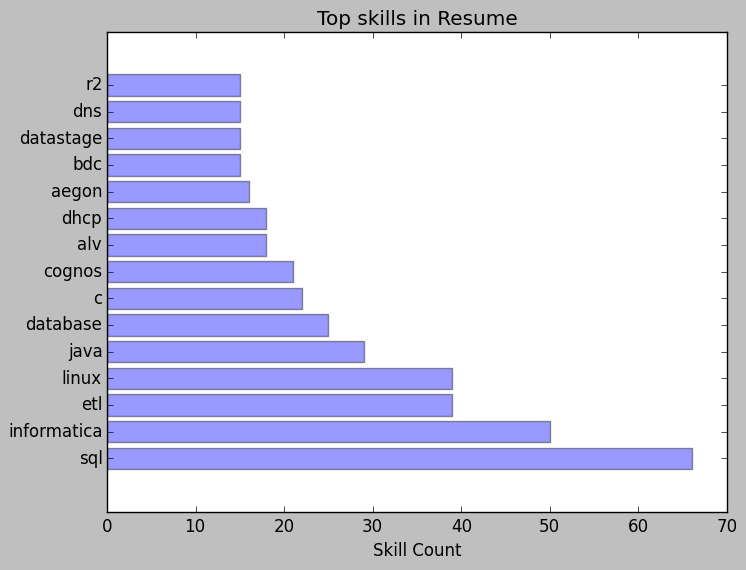

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

skill_name=[]
skill_count=[]
for point in TechWordFerq[:15]:
   skill_name.append(point[0])
   skill_count.append(point[1])

y_pos = np.arange(len(skill_name))

plt.barh(y_pos, skill_count, align='center', alpha=0.4)
plt.yticks(y_pos, skill_name)
plt.xlabel('Skill Count')
plt.title('Top skills in Resume')
plt.show()

Words that most commonly occur with the identified skills

In [9]:
words = [w.lower().lstrip('\x07').rstrip('?:!.,;') for w in text.split()]
bcf = BigramCollocationFinder.from_words(words)
stopset = set(stopwords.words('english'))
filter_stops = lambda w: len(w) < 2 or w in stopset
bcf.apply_word_filter(filter_stops)
collocation=bcf.nbest(BigramAssocMeasures.likelihood_ratio, 200) 

                   
def compare(s1, s2):
    remove = string.punctuation + string.whitespace
    return s1.translate(None, remove) == s2.translate(None, remove)


Skill_collocation=[]
for z in HighFreq:
    for tup in collocation:
        if compare(tup[0],z.lower()) or compare(tup[1],z.lower()) :
            Skill_collocation.append(tup)
#Will update the output to give frequency count of the collocation as well

In [10]:
coll_header=['Word1', 'Word2']
dff = pd.DataFrame(Skill_collocation, columns=coll_header)
dff.head(10)[dff.columns[0:2]]

,Word1,Word2
0,sql,server
1,informatica,power
2,using,informatica
3,alv,report
4,aegon,netherlands
5,datastage,8.5
6,cisco,routers
7,windows,xp
8,pl/sql,developer
9,tata,consultancy
